In [1]:
import numpy as np
import pandas as pd

import math
import datetime
import seaborn as sns
from random import random
import matplotlib.pyplot as plt
from statsmodels.graphics import tsaplots

from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA

from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
pd.set_option('display.max_rows', 1000)

## First look at the data:

### ASC_AntenaEvent

In [3]:
ASC_orig = pd.read_csv("ASC_AntenaEvent.csv", parse_dates=['probingTimestamp'], sep=';')

In [4]:
ASC_orig

,dataStream,rows,probingTimestamp
0,ASC_AntenaEvent,112800665,2020-01-13 09:32:03.053
1,ASC_AntenaEvent,106610066,2020-01-11 00:56:00.353
2,ASC_AntenaEvent,106610066,2020-01-11 00:57:00.280
3,ASC_AntenaEvent,106610066,2020-01-11 00:58:00.763
4,ASC_AntenaEvent,106610066,2020-01-11 00:59:00.217
...,...,...,...
160726,ASC_AntenaEvent,201545824,2020-05-02 06:27:00.593
160727,ASC_AntenaEvent,201545824,2020-05-02 06:28:00.033
160728,ASC_AntenaEvent,201545824,2020-05-02 07:37:00.697
160729,ASC_AntenaEvent,201545824,2020-05-02 06:29:00.493


In [5]:
ASC_orig.dtypes

dataStream                  object
rows                         int64
probingTimestamp    datetime64[ns]
dtype: object

In [6]:
len(ASC_orig.index)

160731

In [7]:
ASC_orig.duplicated().sum()

220

In [8]:
ASC = ASC_orig.drop_duplicates()

ASC.duplicated().sum()

0

In [9]:
len(ASC.index)

160511

In [10]:
ASC['dataStream'].unique()

array(['ASC_AntenaEvent'], dtype=object)

In [11]:
ASC['rows'].nunique()

135

In [12]:
ASC['probingTimestamp'].nunique()

160511

In [13]:
ASC.describe()

,rows
count,1.605110e+05
mean,1.722566e+08
std,3.005294e+07
min,1.055903e+08
25%,1.466788e+08
50%,1.837351e+08
75%,2.003999e+08
max,2.015458e+08


In [14]:
ASC_sorted = ASC.sort_values(by='probingTimestamp')
ASC_sorted

,dataStream,rows,probingTimestamp
3548,ASC_AntenaEvent,105590338,2020-01-10 10:04:18.837
3547,ASC_AntenaEvent,105590338,2020-01-10 10:16:29.063
3549,ASC_AntenaEvent,105590338,2020-01-10 10:17:00.510
3554,ASC_AntenaEvent,105590338,2020-01-10 10:18:00.977
3555,ASC_AntenaEvent,105590338,2020-01-10 10:19:00.610
...,...,...,...
160194,ASC_AntenaEvent,201545824,2020-05-02 07:56:00.117
160195,ASC_AntenaEvent,201545824,2020-05-02 07:57:00.537
160198,ASC_AntenaEvent,201545824,2020-05-02 07:58:00.083
160202,ASC_AntenaEvent,201545824,2020-05-02 07:59:00.543


Let's see how the distribution of 'rows' looks like:

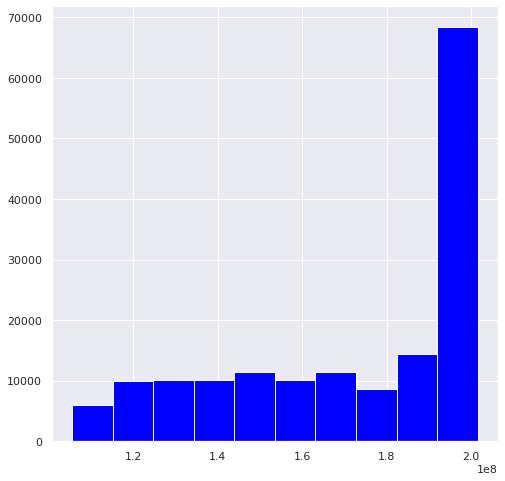

In [15]:
sns.set() 
ASC_sorted['rows'].hist(figsize=(8, 8), color='blue') 
plt.show()

### BCL_TaskCreation

In [16]:
BCL_orig = pd.read_csv("BCL_TaskCreation.csv", parse_dates=['probingTimestamp'], sep=';')

In [17]:
BCL_orig.head()

,dataStream,rowCount,probingTimestamp
0,BCL_TaskCreation,315349655,2020-01-13 09:33:00.497
1,BCL_TaskCreation,315349655,2020-01-13 09:34:00.157
2,BCL_TaskCreation,314533770,2020-01-11 01:18:00.143
3,BCL_TaskCreation,289249872,2020-04-05 16:10:00.333
4,BCL_TaskCreation,289249872,2020-04-05 16:11:00.883


In [18]:
len(BCL_orig.index)

160735

In [19]:
BCL_orig.duplicated().sum()

222

In [20]:
BCL = BCL_orig.drop_duplicates()

BCL.duplicated().sum()

0

In [21]:
BCL['dataStream'].unique()

array(['BCL_TaskCreation'], dtype=object)

In [22]:
BCL['rowCount'].nunique()

6612

In [23]:
BCL['probingTimestamp'].nunique()

160513

In [24]:
len(BCL.index)

160513

In [25]:
BCL.describe()

,rowCount
count,1.605130e+05
mean,3.080702e+08
std,1.972761e+07
min,2.832401e+08
25%,2.893906e+08
50%,3.140155e+08
75%,3.276823e+08
max,3.388414e+08


In [26]:
BCL_sorted = BCL.sort_values(by='probingTimestamp')

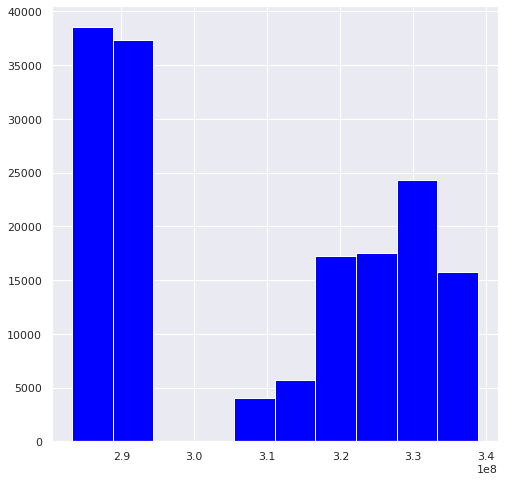

In [27]:
sns.set() 
BCL_sorted['rowCount'].hist(figsize=(8, 8), color='blue') 
plt.show()

### DTTB_IncomeEvents

In [28]:
DTTB_orig = pd.read_csv("DTTB_IncomeEvents.csv", parse_dates=['probingTimestamp'], sep=';')

In [29]:
DTTB_orig.head()

,dataStream,rowCount,probingTimestamp
0,DTTB_IncomeEvents,2045565,2020-01-11 01:58:00.150
1,DTTB_IncomeEvents,2045565,2020-01-11 01:59:00.760
2,DTTB_IncomeEvents,2047466,2020-01-13 09:36:00.877
3,DTTB_IncomeEvents,2045565,2020-01-11 02:00:00.307
4,DTTB_IncomeEvents,2045565,2020-01-11 02:01:00.930


In [30]:
len(DTTB_orig.index)

160676

In [31]:
DTTB_orig.duplicated().sum()

202

In [32]:
DTTB = DTTB_orig.drop_duplicates()

DTTB.duplicated().sum()

0

In [33]:
DTTB['dataStream'].unique()

array(['DTTB_IncomeEvents'], dtype=object)

In [34]:
DTTB['rowCount'].nunique()

347

In [35]:
DTTB['probingTimestamp'].nunique()

160474

In [36]:
len(DTTB.index)

160474

In [37]:
DTTB.describe()

,rowCount
count,1.604740e+05
mean,6.036008e+05
std,6.760497e+05
min,3.253300e+04
25%,2.653560e+05
50%,2.978140e+05
75%,3.231980e+05
max,2.067878e+06


In [38]:
DTTB_sorted = DTTB.sort_values(by='probingTimestamp')

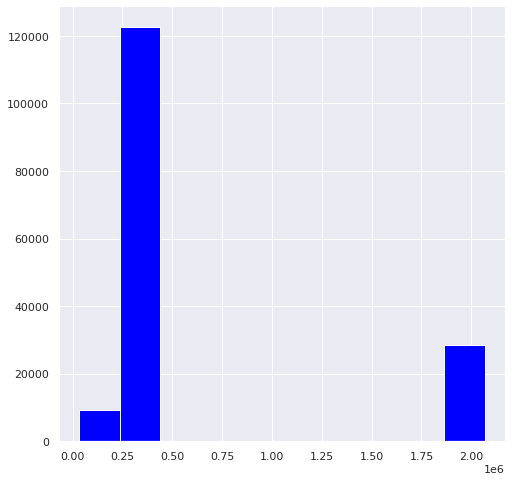

In [39]:
sns.set() 
DTTB_sorted['rowCount'].hist(figsize=(8, 8), color='blue') 
plt.show()

## Preliminary remarks:

* I dropped **duplicates**,
* each dataframe has only one **dataStream**, referring to its' name,
* every dataframe has different number of **rowCount** values (ASC: 135, BCL: 6612, DTTB: 347), whereas all **probingTimestamp** values are unique and its' number is similar in each df (around 160500),
* as we can see above, at least some of **probingTimestamp** values are the same in these 3 dataframes - I'm going to **merge them by probingTimestamp**,
* data was collected from 2020-01-10 10:04:18.837 to 2020-05-02 07:57:00.537.

# 1. Loading the data into one dataframe

### Preparing dataframes for merging

#### ASC

I assume that "rows" column in ASC_AntenaEvent DataFrame is the same as "rowCount" in another DataFrames. Therefore I'm going to change its' name to make merge easier:

In [40]:
ASC_final = ASC_sorted.rename(columns={'rows': 'rowCount_ASC'})

Before merging I'm going to edit dataStream data (into boolean) to increase their readability in the final dataframe:

In [41]:
ASC_final = ASC_final.rename(columns={'dataStream': 'ASC_AntenaEvent'})

ASC_final = ASC_final.replace({'ASC_AntenaEvent':1})

ASC_final.head()

,ASC_AntenaEvent,rowCount_ASC,probingTimestamp
3548,1,105590338,2020-01-10 10:04:18.837
3547,1,105590338,2020-01-10 10:16:29.063
3549,1,105590338,2020-01-10 10:17:00.510
3554,1,105590338,2020-01-10 10:18:00.977
3555,1,105590338,2020-01-10 10:19:00.610


In [42]:
ASC_final['ASC_AntenaEvent'].unique()

array([1])

#### BCL

In [43]:
BCL_final = BCL_sorted.rename(columns={'dataStream': 'BCL_TaskCreation'})

BCL_final = BCL_final.replace({'BCL_TaskCreation':1})

BCL_final = BCL_final.rename(columns={'rowCount': 'rowCount_BCL'})

BCL_final.head()

,BCL_TaskCreation,rowCount_BCL,probingTimestamp
3506,1,314015548,2020-01-10 10:04:18.837
3505,1,314015548,2020-01-10 10:16:29.063
3507,1,314015548,2020-01-10 10:17:00.510
3512,1,314015548,2020-01-10 10:18:00.977
3513,1,314015548,2020-01-10 10:19:00.610


#### DTTB

In [44]:
DTTB_final = DTTB_sorted.rename(columns={'dataStream': 'DTTB_IncomeEvents'})

DTTB_final = DTTB_final.replace({'DTTB_IncomeEvents':1})

DTTB_final = DTTB_final.rename(columns={'rowCount': 'rowCount_DTTB'})

DTTB_final.head()

,DTTB_IncomeEvents,rowCount_DTTB,probingTimestamp
3588,1,2044256,2020-01-10 10:04:18.837
3587,1,2044256,2020-01-10 10:16:29.063
3593,1,2044256,2020-01-10 10:17:00.510
3594,1,2044256,2020-01-10 10:18:00.977
3595,1,2044256,2020-01-10 10:19:00.610


In [45]:
DTTB_final['DTTB_IncomeEvents'].unique()

array([1])

### Merging time:

In my opinion **outer** type of merge is the best in this situation. 

In [46]:
draft_dataset = ASC_final.merge(BCL_final, how='outer', on='probingTimestamp')

draft_dataset

,ASC_AntenaEvent,rowCount_ASC,probingTimestamp,BCL_TaskCreation,rowCount_BCL
0,1.0,105590338.0,2020-01-10 10:04:18.837,1,314015548
1,1.0,105590338.0,2020-01-10 10:16:29.063,1,314015548
2,1.0,105590338.0,2020-01-10 10:17:00.510,1,314015548
3,1.0,105590338.0,2020-01-10 10:18:00.977,1,314015548
4,1.0,105590338.0,2020-01-10 10:19:00.610,1,314015548
...,...,...,...,...,...
160508,1.0,201545824.0,2020-05-02 07:58:00.083,1,289702943
160509,1.0,201545824.0,2020-05-02 07:59:00.543,1,289702943
160510,1.0,201545824.0,2020-05-02 08:00:00.120,1,289702943
160511,NaN,NaN,2020-03-25 04:01:00.973,1,287893459


In [47]:
len(draft_dataset.index)

160513

In [48]:
len(ASC_final.index)

160511

In [49]:
len(BCL_final.index)

160513

In [50]:
draft_dataset.duplicated().sum()

0

In [51]:
draft_dataset = draft_dataset.merge(DTTB_final, how='outer', on='probingTimestamp')

draft_dataset

,ASC_AntenaEvent,rowCount_ASC,probingTimestamp,BCL_TaskCreation,rowCount_BCL,DTTB_IncomeEvents,rowCount_DTTB
0,1.0,105590338.0,2020-01-10 10:04:18.837,1.0,314015548.0,1.0,2044256.0
1,1.0,105590338.0,2020-01-10 10:16:29.063,1.0,314015548.0,1.0,2044256.0
2,1.0,105590338.0,2020-01-10 10:17:00.510,1.0,314015548.0,1.0,2044256.0
3,1.0,105590338.0,2020-01-10 10:18:00.977,1.0,314015548.0,1.0,2044256.0
4,1.0,105590338.0,2020-01-10 10:19:00.610,1.0,314015548.0,1.0,2044256.0
...,...,...,...,...,...,...,...
160515,NaN,NaN,2020-04-05 00:48:02.250,NaN,NaN,1.0,298126.0
160516,NaN,NaN,2020-04-05 02:07:01.027,NaN,NaN,1.0,298126.0
160517,NaN,NaN,2020-04-05 02:27:00.667,NaN,NaN,1.0,298126.0
160518,NaN,NaN,2020-04-05 03:25:00.270,NaN,NaN,1.0,298126.0


In [52]:
len(draft_dataset.index)

160520

Ok. We have few (7) additional rows, it's because of outer merge (for the record work_dataset before merging with DTTB had 160513 rows, and DTTB: 160474). This number is not alarming, I will deal with it in next steps.

Now, I will only rearrange probingTimestamp column to increase readability:

In [53]:
draft_dataset = draft_dataset[['ASC_AntenaEvent', 'rowCount_ASC', 'BCL_TaskCreation', 'rowCount_BCL', 'DTTB_IncomeEvents', 'rowCount_DTTB', 'probingTimestamp']]

draft_dataset

,ASC_AntenaEvent,rowCount_ASC,BCL_TaskCreation,rowCount_BCL,DTTB_IncomeEvents,rowCount_DTTB,probingTimestamp
0,1.0,105590338.0,1.0,314015548.0,1.0,2044256.0,2020-01-10 10:04:18.837
1,1.0,105590338.0,1.0,314015548.0,1.0,2044256.0,2020-01-10 10:16:29.063
2,1.0,105590338.0,1.0,314015548.0,1.0,2044256.0,2020-01-10 10:17:00.510
3,1.0,105590338.0,1.0,314015548.0,1.0,2044256.0,2020-01-10 10:18:00.977
4,1.0,105590338.0,1.0,314015548.0,1.0,2044256.0,2020-01-10 10:19:00.610
...,...,...,...,...,...,...,...
160515,NaN,NaN,NaN,NaN,1.0,298126.0,2020-04-05 00:48:02.250
160516,NaN,NaN,NaN,NaN,1.0,298126.0,2020-04-05 02:07:01.027
160517,NaN,NaN,NaN,NaN,1.0,298126.0,2020-04-05 02:27:00.667
160518,NaN,NaN,NaN,NaN,1.0,298126.0,2020-04-05 03:25:00.270


Here we can see side effect of merge: **NaN**. Let's see how it looks like:

In [54]:
draft_dataset.isna().sum()

ASC_AntenaEvent       9
rowCount_ASC          9
BCL_TaskCreation      7
rowCount_BCL          7
DTTB_IncomeEvents    46
rowCount_DTTB        46
probingTimestamp      0
dtype: int64

I colud replace NaN values using eg. "0", but number of NaN rows compared to the total amount of data is faint. 
In order to make things easier, I decided to remove them.

In [55]:
draft_dataset = draft_dataset.dropna()

In [56]:
draft_dataset

,ASC_AntenaEvent,rowCount_ASC,BCL_TaskCreation,rowCount_BCL,DTTB_IncomeEvents,rowCount_DTTB,probingTimestamp
0,1.0,105590338.0,1.0,314015548.0,1.0,2044256.0,2020-01-10 10:04:18.837
1,1.0,105590338.0,1.0,314015548.0,1.0,2044256.0,2020-01-10 10:16:29.063
2,1.0,105590338.0,1.0,314015548.0,1.0,2044256.0,2020-01-10 10:17:00.510
3,1.0,105590338.0,1.0,314015548.0,1.0,2044256.0,2020-01-10 10:18:00.977
4,1.0,105590338.0,1.0,314015548.0,1.0,2044256.0,2020-01-10 10:19:00.610
...,...,...,...,...,...,...,...
160506,1.0,201545824.0,1.0,289702943.0,1.0,323397.0,2020-05-02 07:56:00.117
160507,1.0,201545824.0,1.0,289702943.0,1.0,323397.0,2020-05-02 07:57:00.537
160508,1.0,201545824.0,1.0,289702943.0,1.0,323397.0,2020-05-02 07:58:00.083
160509,1.0,201545824.0,1.0,289702943.0,1.0,323397.0,2020-05-02 07:59:00.543


In [57]:
draft_dataset = draft_dataset.sort_values(by='probingTimestamp')

In [58]:
draft_dataset

,ASC_AntenaEvent,rowCount_ASC,BCL_TaskCreation,rowCount_BCL,DTTB_IncomeEvents,rowCount_DTTB,probingTimestamp
0,1.0,105590338.0,1.0,314015548.0,1.0,2044256.0,2020-01-10 10:04:18.837
1,1.0,105590338.0,1.0,314015548.0,1.0,2044256.0,2020-01-10 10:16:29.063
2,1.0,105590338.0,1.0,314015548.0,1.0,2044256.0,2020-01-10 10:17:00.510
3,1.0,105590338.0,1.0,314015548.0,1.0,2044256.0,2020-01-10 10:18:00.977
4,1.0,105590338.0,1.0,314015548.0,1.0,2044256.0,2020-01-10 10:19:00.610
...,...,...,...,...,...,...,...
160506,1.0,201545824.0,1.0,289702943.0,1.0,323397.0,2020-05-02 07:56:00.117
160507,1.0,201545824.0,1.0,289702943.0,1.0,323397.0,2020-05-02 07:57:00.537
160508,1.0,201545824.0,1.0,289702943.0,1.0,323397.0,2020-05-02 07:58:00.083
160509,1.0,201545824.0,1.0,289702943.0,1.0,323397.0,2020-05-02 07:59:00.543


### Correlation

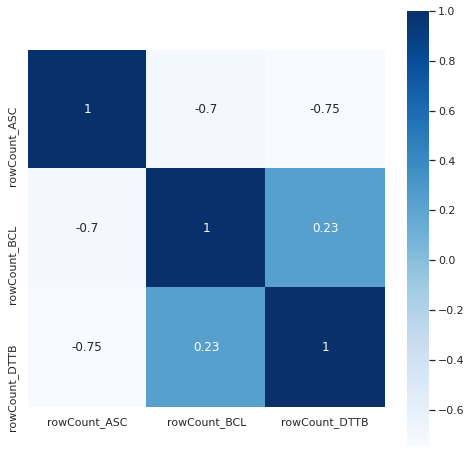

In [59]:
correlation = draft_dataset[['rowCount_ASC', 'rowCount_BCL', 'rowCount_DTTB']].corr()

fig = plt.subplots(figsize=(8, 8))
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='Blues')

There is very strong correlation in rowCount between:
* ASC & DTTB: **-0.75**
* ASC & BCL: **-0.7**

Correlation between BCL and DTTB is lower, but 0.23 is also not a small one.

#### As we can see in previous analysis, there are many values of probingTimestamp per one rowCount value. So, I'll try to group the data by rowCounts.

### Grouping by rowCount_ASC

I would like to see an arrangement of probingTimestamp for rowCount.

In [60]:
probingTimestamp_per_rowcount_ASC = pd.DataFrame(draft_dataset, columns = ['rowCount_ASC', 'probingTimestamp'])

probingTimestamp_per_rowcount_ASC = probingTimestamp_per_rowcount_ASC.groupby('rowCount_ASC').agg('count')

probingTimestamp_per_rowcount_ASC = probingTimestamp_per_rowcount_ASC.sort_values(by='probingTimestamp')

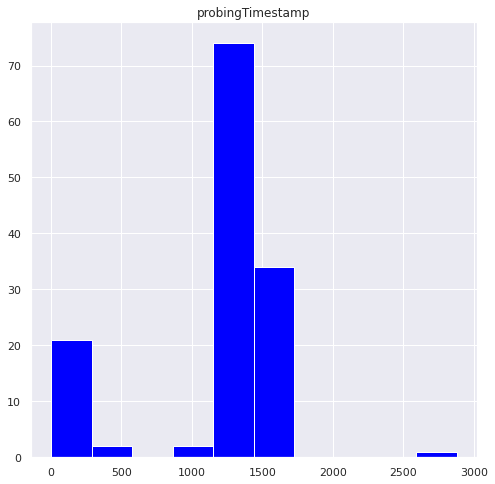

In [61]:
sns.set() 
probingTimestamp_per_rowcount_ASC.hist(figsize=(8, 8), color='blue') 
plt.show()

### Grouping by rowCount_BCL

In [62]:
probingTimestamp_per_rowcount_BCL = pd.DataFrame(draft_dataset, columns = ['rowCount_BCL','probingTimestamp'])

probingTimestamp_per_rowcount_BCL = probingTimestamp_per_rowcount_BCL.groupby('rowCount_BCL').agg('count')

probingTimestamp_per_rowcount_BCL = probingTimestamp_per_rowcount_BCL.sort_values(by='probingTimestamp')

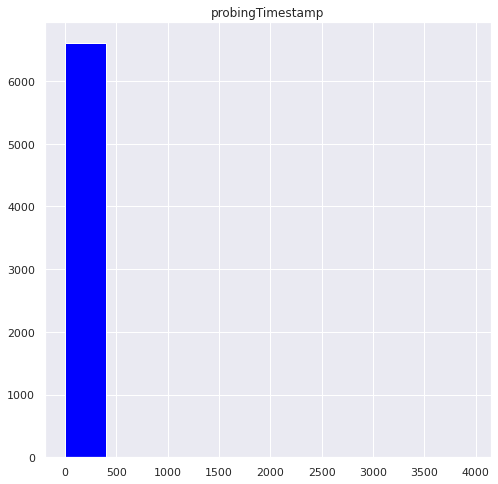

In [63]:
sns.set() 
probingTimestamp_per_rowcount_BCL.hist(figsize=(8, 8), color='blue') 
plt.show()

### Grouping by rowCount_DTTB

In [64]:
probingTimestamp_per_rowcount_DTTB = pd.DataFrame(draft_dataset, columns = ['rowCount_DTTB','probingTimestamp'])

probingTimestamp_per_rowcount_DTTB = probingTimestamp_per_rowcount_DTTB.groupby('rowCount_DTTB').agg('count')

probingTimestamp_per_rowcount_DTTB = probingTimestamp_per_rowcount_DTTB.sort_values(by='probingTimestamp')

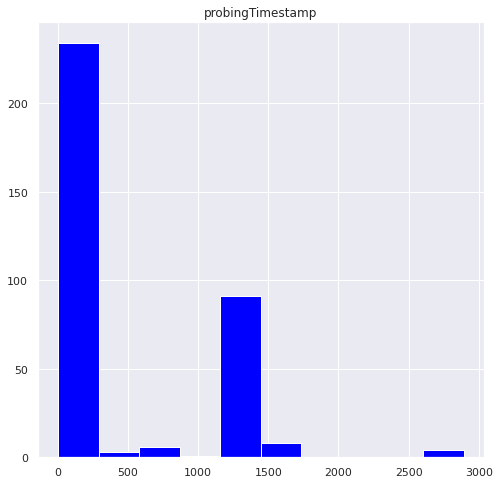

In [65]:
sns.set() 
probingTimestamp_per_rowcount_DTTB.hist(figsize=(8, 8), color='blue') 
plt.show()

## Differences between probingTimestamp values

I have also an idea to check differences between probingTimestamp values: time series are characterized by the recording of values at equal time intervals, so in my opinion it's important to check it. I started it below, but I deicided to finish it later because at first I want to deal with the models. 

In [66]:
draft_dataset_diff = draft_dataset.copy(deep=True)

draft_dataset_diff.probingTimestamp = pd.to_datetime(draft_dataset_diff.probingTimestamp)

draft_dataset_diff['Difference'] = np.where(draft_dataset_diff.rowCount_ASC == draft_dataset_diff.rowCount_ASC.shift(), draft_dataset_diff.probingTimestamp - draft_dataset_diff.probingTimestamp.shift(), np.nan)

draft_dataset_diff

,ASC_AntenaEvent,rowCount_ASC,BCL_TaskCreation,rowCount_BCL,DTTB_IncomeEvents,rowCount_DTTB,probingTimestamp,Difference
0,1.0,105590338.0,1.0,314015548.0,1.0,2044256.0,2020-01-10 10:04:18.837,NaT
1,1.0,105590338.0,1.0,314015548.0,1.0,2044256.0,2020-01-10 10:16:29.063,0 days 00:12:10.226000
2,1.0,105590338.0,1.0,314015548.0,1.0,2044256.0,2020-01-10 10:17:00.510,0 days 00:00:31.447000
3,1.0,105590338.0,1.0,314015548.0,1.0,2044256.0,2020-01-10 10:18:00.977,0 days 00:01:00.467000
4,1.0,105590338.0,1.0,314015548.0,1.0,2044256.0,2020-01-10 10:19:00.610,0 days 00:00:59.633000
...,...,...,...,...,...,...,...,...
160506,1.0,201545824.0,1.0,289702943.0,1.0,323397.0,2020-05-02 07:56:00.117,0 days 00:00:59.497000
160507,1.0,201545824.0,1.0,289702943.0,1.0,323397.0,2020-05-02 07:57:00.537,0 days 00:01:00.420000
160508,1.0,201545824.0,1.0,289702943.0,1.0,323397.0,2020-05-02 07:58:00.083,0 days 00:00:59.546000
160509,1.0,201545824.0,1.0,289702943.0,1.0,323397.0,2020-05-02 07:59:00.543,0 days 00:01:00.460000


Another thing worth checking out is mean value of rowCount per one minute/hour/day - I'm going to deal with it later.

## More plots..

### ASC

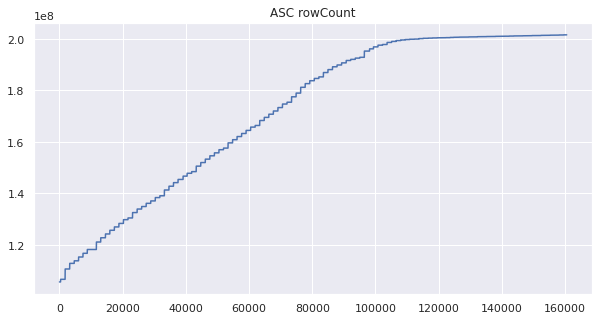

In [67]:
draft_dataset['rowCount_ASC'].plot(figsize=(10, 5), title = "ASC rowCount")

### BCL

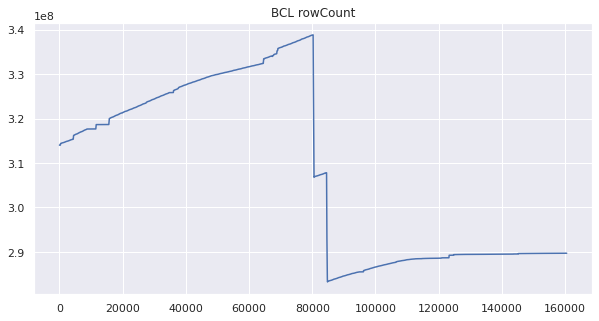

In [68]:
draft_dataset['rowCount_BCL'].plot(figsize=(10, 5), title = "BCL rowCount")

### DTTB

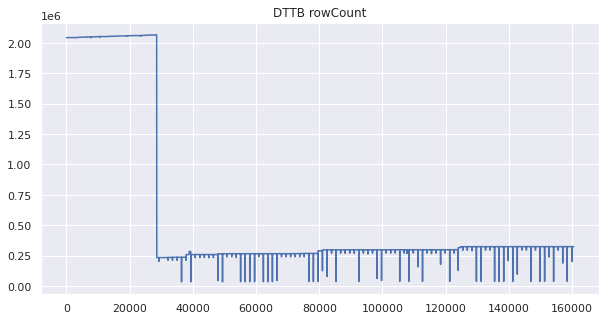

In [69]:
draft_dataset['rowCount_DTTB'].plot(figsize=(10, 5), title = "DTTB rowCount")

In the plot above we can see many anomalies.

### ASC, BCL and DTTB

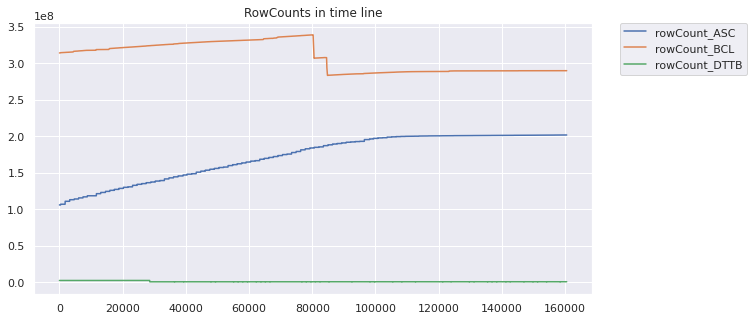

In [70]:
draft_dataset['rowCount_ASC'].plot(figsize=(10,5))
draft_dataset['rowCount_BCL'].plot(figsize=(10,5))
draft_dataset['rowCount_DTTB'].plot(figsize=(10,5))
plt.title("RowCounts in time line")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

There is a discrepancy between DTTB plot and plot for all data - I'm not sure why yet.

## Autocorrelation

Autocorrelation measures the correlation (similarity) between the time series and a lagged version of itself.

### ASC

In [71]:
lag = range(0, 31)
ASC_acf = []
for l in lag:
    ASC_acf.append(draft_dataset['rowCount_ASC'].autocorr(l))

Text(0.5, 1.0, 'Autocorrelation function for ASC')

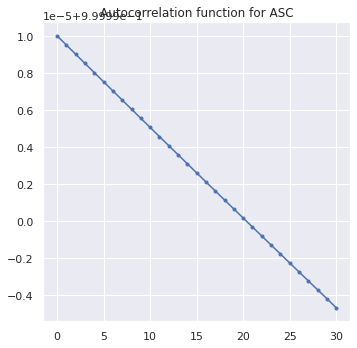

In [72]:
plt.figure(figsize=(5.5, 5.5))
plt.plot(ASC_acf, marker='.', color='b')
plt.title('Autocorrelation function for ASC')

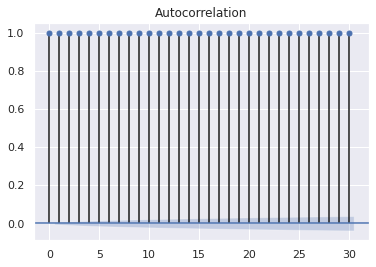

In [73]:
tsaplots.plot_acf(draft_dataset['rowCount_ASC'], lags=30)
plt.show()

### BCL

In [74]:
BCL_acf = []
for l in lag:
    BCL_acf.append(draft_dataset['rowCount_BCL'].autocorr(l))

Text(0.5, 1.0, 'Autocorrelation function for BCL')

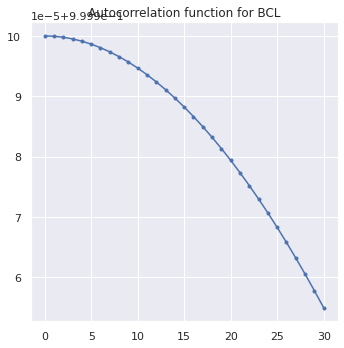

In [75]:
plt.figure(figsize=(5.5, 5.5))
plt.plot(BCL_acf, marker='.', color='b')
plt.title('Autocorrelation function for BCL')

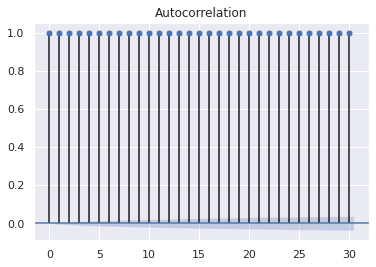

In [76]:
tsaplots.plot_acf(draft_dataset['rowCount_BCL'], lags=30)
plt.show()

### DTTB

In [77]:
DTTB_acf = []
for l in lag:
    DTTB_acf.append(draft_dataset['rowCount_DTTB'].autocorr(l))

Text(0.5, 1.0, 'Autocorrelation function for DTTB')

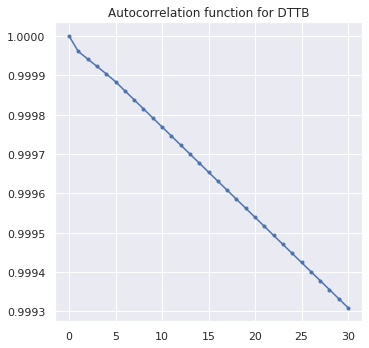

In [78]:
plt.figure(figsize=(5.5, 5.5))
plt.plot(DTTB_acf, marker='.', color='b')
plt.title('Autocorrelation function for DTTB')

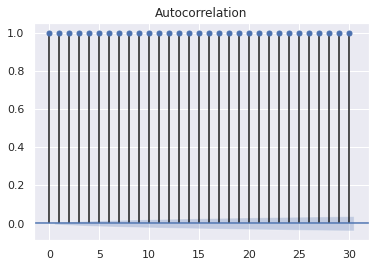

In [79]:
tsaplots.plot_acf(draft_dataset['rowCount_DTTB'], lags=30)
plt.show()

# Models

### Data

To save some time, I'm going to split data only in proportions similar to: 80% training data, 20% testing data.

Of course there are other methods, like TimeSeriesSplit. 
I could also write a code which finds proportions with the highest score of model, but to do this I need more time - here I need a base for sample models. 

In [80]:
data_ASC = draft_dataset['rowCount_ASC'].values
train_data_ASC = draft_dataset['rowCount_ASC'].iloc[:128000]
test_data_ASC = draft_dataset['rowCount_ASC'].iloc[128000:]

data_BCL = draft_dataset['rowCount_BCL'].values
train_data_BCL = draft_dataset['rowCount_BCL'].iloc[:128000]
test_data_BCL = draft_dataset['rowCount_BCL'].iloc[128000:]

data_DTTB = draft_dataset['rowCount_DTTB'].values
train_data_DTTB = draft_dataset['rowCount_DTTB'].iloc[:128000]
test_data_DTTB = draft_dataset['rowCount_DTTB'].iloc[128000:]

### Metrics

To increase readability of data, I'll  define metrics before I start with models.

#### Mean Absolute Percentage Error (MAPE)
This is an average of the absolute percentage errors of forecasts.

In [81]:
def MAPE(y,y_pred):
    mape = np.mean(np.abs((y - y_pred)/y))*100
    return mape

#### Mean Error (ME)
This is an average of all the errors in a set.

In [82]:
def ME(y, y_pred):
    me = np.mean(y_pred - y)
    return me

#### Root Mean Squared Error (RMSE)
Is the standard deviation of the residuals (prediction errors).

In [83]:
def RMSE(MSE):
    rmse = math.sqrt(MSE)
    print(rmse)

**Metrics imported from sklearn**:
#### Mean Squared Error (MSE)
Shows an average squared difference between the estimated values and the actual value.
#### Mean Absolute Error (MAE)
It is an arithmetic average of the absolute errors.

## Autoregression (AR)

I create function which splits the data, fits AutoRegression model, makes prediction and evaluate the model.

In [84]:
def autoregression_split_fit_predict_plot_evaluate(data):
    
    dataset = data.values
    train_data = data.iloc[:128000]
    test_data = data.iloc[128000:]
    
    model = AutoReg(train_data, lags=1)
    
    fit_model = model.fit()
    
    yhat = fit_model.predict(128000, len(dataset)-1)
    
    pd.DataFrame(yhat, columns=["y_predicted"]).plot()
    data.plot()
    plt.legend()
    
    MAPE_metric = MAPE(test_data, yhat)
    print("MAPE =", MAPE_metric)
    ME_metric = ME(test_data, yhat)
    print("ME =", ME_metric)
    MAE_metric = mean_absolute_error(test_data, yhat)
    print("MAE =", MAE_metric)
    MSE_metric = mean_squared_error(test_data, yhat)
    print("MSE =", MSE_metric)
    print("RMSE =")
    RMSE_metric = RMSE(MSE_metric)

### ASC

/home/katarzyna/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/katarzyna/.local/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,
/home/katarzyna/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/home/katarzyna/.local/lib/python3.7/site-packages/statsmodels/tsa/deterministic.py:152: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the posit

MAPE = 2.3821971239481385
ME = 4793997.385844714
MAE = 4787543.544883688
MSE = 29637600204774.85
RMSE =
5444042.6343641775


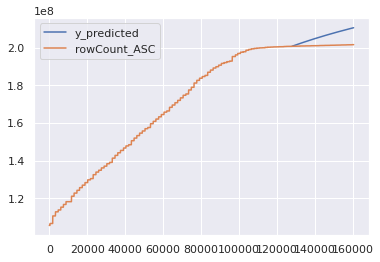

In [85]:
autoregression_split_fit_predict_plot_evaluate(draft_dataset['rowCount_ASC'])

Predicted data do not overlap with real one, because the model is based on a trend that it has learned from the training data.

### BCL

/home/katarzyna/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/katarzyna/.local/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,
/home/katarzyna/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/home/katarzyna/.local/lib/python3.7/site-packages/statsmodels/tsa/deterministic.py:152: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the posit

MAPE = 1.9591186351096963
ME = -5674114.761364143
MAE = 5668029.228240131
MSE = 43613829918237.93
RMSE =
6604076.76501704


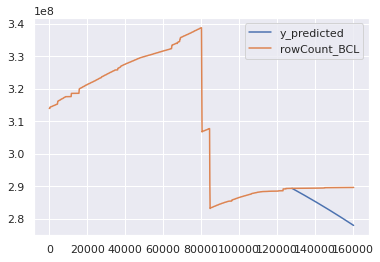

In [86]:
autoregression_split_fit_predict_plot_evaluate(draft_dataset['rowCount_BCL'])

### DTTB

/home/katarzyna/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/katarzyna/.local/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,
/home/katarzyna/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/home/katarzyna/.local/lib/python3.7/site-packages/statsmodels/tsa/deterministic.py:152: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the posit

MAPE = 3.4737393984256064
ME = 10428.910556815732
MAE = 10416.59042812543
MSE = 163303801.2249937
RMSE =
12779.037570372571


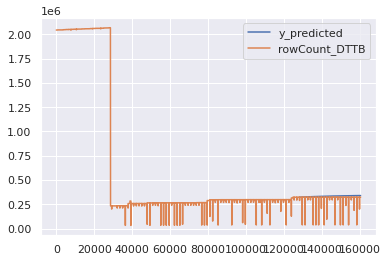

In [87]:
autoregression_split_fit_predict_plot_evaluate(draft_dataset['rowCount_DTTB'])

## Autoregressive Moving Average (ARMA)

In [88]:
def arma_split_fit_predict_plot_evaluate(data):
    
    dataset = data.values
    train_data = data.iloc[:128000]
    test_data = data.iloc[128000:]
    
    model = ARIMA(train_data, order=(2, 0, 1))
    
    fit_model = model.fit()
    
    yhat = fit_model.predict(128000, len(dataset)-1)
    
    pd.DataFrame(yhat).plot()
    data.plot()
    plt.legend()
    
    MAPE_metric = MAPE(test_data, yhat)
    print("MAPE =", MAPE_metric)
    ME_metric = ME(test_data, yhat)
    print("ME =", ME_metric)
    MAE_metric = mean_absolute_error(test_data, yhat)
    print("MAE =", MAE_metric)
    MSE_metric = mean_squared_error(test_data, yhat)
    print("MSE =", MSE_metric)
    print("RMSE =")
    RMSE_metric = RMSE(MSE_metric)

### ASC

/home/katarzyna/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/katarzyna/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/katarzyna/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/katarzyna/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


MAPE = 0.2806256971006058
ME = -564771.8044949673
MAE = 565189.6342426004
MSE = 429396113412.02295
RMSE =
655283.2314442534


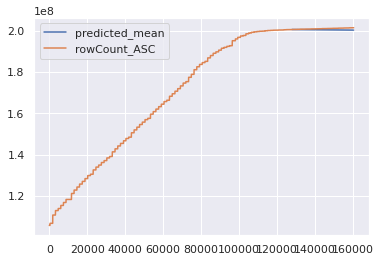

In [89]:
arma_split_fit_predict_plot_evaluate(draft_dataset['rowCount_ASC'])

### BCL

/home/katarzyna/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/katarzyna/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/katarzyna/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/katarzyna/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


MAPE = 0.38248579281639605
ME = 1107757.416603492
MAE = 1106173.147935224
MSE = 1597093428531.275
RMSE =
1263761.6185544152


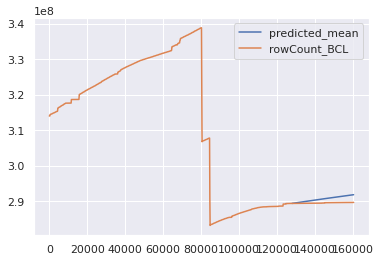

In [90]:
arma_split_fit_predict_plot_evaluate(draft_dataset['rowCount_BCL'])

### DTTB

/home/katarzyna/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/katarzyna/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/katarzyna/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/katarzyna/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


MAPE = 41.43265714025456
ME = 132751.18716323635
MAE = 132601.8276390657
MSE = 21801506359.209217
RMSE =
147653.33169017627


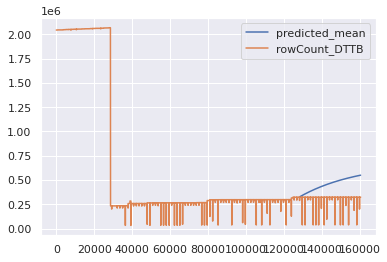

In [91]:
arma_split_fit_predict_plot_evaluate(draft_dataset['rowCount_DTTB'])

## Autoregressive Integrated Moving Average (ARIMA)

In [92]:
def arima_split_fit_predict_plot_evaluate(data):
    
    dataset = data.values
    train_data = data.iloc[:128000]
    test_data = data.iloc[128000:]
    
    model = ARIMA(train_data, order=(1, 1, 1))
    
    fit_model = model.fit()
    
    yhat = fit_model.predict(128000, len(dataset)-1)
    
    pd.DataFrame(yhat).plot()
    data.plot()
    plt.legend()
    
    MAPE_metric = MAPE(test_data, yhat)
    print("MAPE =", MAPE_metric)
    ME_metric = ME(test_data, yhat)
    print("ME =", ME_metric)
    MAE_metric = mean_absolute_error(test_data, yhat)
    print("MAE =", MAE_metric)
    MSE_metric = mean_squared_error(test_data, yhat)
    print("MSE =", MSE_metric)
    print("RMSE =")
    RMSE_metric = RMSE(MSE_metric)

### ASC

/home/katarzyna/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/katarzyna/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/katarzyna/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/katarzyna/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


MAPE = 0.2054821717505712
ME = -413544.2958393733
MAE = 414132.92808082054
MSE = 231345262049.76813
RMSE =
480983.64010615594


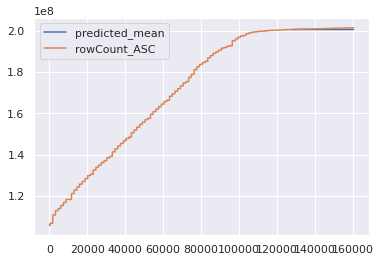

In [93]:
arima_split_fit_predict_plot_evaluate(draft_dataset['rowCount_ASC'])

### BCL

/home/katarzyna/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/katarzyna/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/katarzyna/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/katarzyna/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/katarzyna/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No sup

MAPE = 0.04455701233253516
ME = -129056.83568745549
MAE = 129243.81309750289
MSE = 26299893298.286976
RMSE =
162172.41842646047


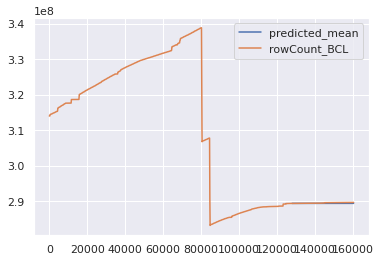

In [94]:
arima_split_fit_predict_plot_evaluate(draft_dataset['rowCount_BCL'])

### DTTB

/home/katarzyna/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/katarzyna/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/katarzyna/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/katarzyna/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


MAPE = 0.37959837635754584
ME = 33.27070289609228
MAE = 459.59842301413744
MSE = 32982279.82499153
RMSE =
5743.020096168177


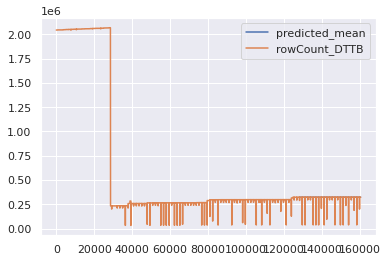

In [95]:
arima_split_fit_predict_plot_evaluate(draft_dataset['rowCount_DTTB'])

# _To be continued..._